In [83]:
# Importing all Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import plotly.graph_objs as go
import plotly.subplots as sp
from scipy.stats import mstats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Life Expectancy Data.csv


In [84]:
#Reading the dataset
df=pd.read_csv('/kaggle/input/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [85]:
#Size of the Dataset
df.shape

(2938, 22)

In [86]:
#Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [87]:
# Loading dataset
df = pd.read_csv('/kaggle/input/Life Expectancy Data.csv')

# Step 1: Check for missing values before imputation
print("Missing values before imputation:\n", df.isnull().sum())

# Step 2: Replace the Null Values with median values of the data
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# List of columns to impute with median
columns_to_impute = [
    'Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 
    ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 
    'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
    'Income composition of resources', 'Schooling'
]

# Impute each column
for column in columns_to_impute:
    df[column] = imputer.fit_transform(df[[column]])

# Step 3: Check for missing values after imputation
print("Missing values after imputation:\n", df.isnull().sum())

# Step 4: Handle the 'Status' column
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})

# If there are still NaN values in 'Status', fill them if necessary
df['Status'].fillna(-1, inplace=True)  # Using -1 for unknown or missing status

# Create a cleaned dataset
cleaned_df = df.copy()

# Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv('cleaned_life_expectancy_data.csv', index=False)

# Step 5: Display the cleaned DataFrame and summary statistics
print("First few rows of the cleaned DataFrame:\n", cleaned_df.head())



Missing values before imputation:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Missing values after imputation:
 Country                            0
Year                   

In [88]:
#Stastical Analysis
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,0.379405,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [89]:
#Displaying top 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [90]:
# Data exploration
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating correlation matrix
correlation_matrix = numeric_df.corr()

# Displaying first five rows of the correlation matrix
correlation_matrix.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.001864,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Status,-0.001864,1.000000,0.481415,-0.314894,-0.112252,0.579662,0.454261,0.127008,-0.076955,0.309371,-0.115195,0.218628,0.290431,0.215281,-0.148590,0.445981,-0.037606,-0.365814,-0.364179,0.460677,0.492984
Life expectancy,0.170819,0.481415,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.314894,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.112252,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951


In [91]:
# Get numerical columns from cleaned_df
numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate IQR and percentage of outliers
outlier_percentage = {}

for col in numerical_cols:
    Q1 = cleaned_df[col].quantile(0.25)  # First quartile
    Q3 = cleaned_df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_count = cleaned_df[(cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound)].shape[0]
    total_count = cleaned_df[col].shape[0]
    
    # Calculate outlier percentage
    outlier_percentage[col] = (outliers_count / total_count) * 100

# Output the results
for col, percentage in outlier_percentage.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")

Percentage of outliers in Year: 0.00%
Percentage of outliers in Status: 17.43%
Percentage of outliers in Life expectancy : 0.58%
Percentage of outliers in Adult Mortality: 2.93%
Percentage of outliers in infant deaths: 10.72%
Percentage of outliers in Alcohol: 0.10%
Percentage of outliers in percentage expenditure: 13.24%
Percentage of outliers in Hepatitis B: 10.96%
Percentage of outliers in Measles : 18.45%
Percentage of outliers in  BMI : 0.00%
Percentage of outliers in under-five deaths : 13.41%
Percentage of outliers in Polio: 9.50%
Percentage of outliers in Total expenditure: 1.74%
Percentage of outliers in Diphtheria : 10.14%
Percentage of outliers in  HIV/AIDS: 18.45%
Percentage of outliers in GDP: 15.15%
Percentage of outliers in Population: 15.38%
Percentage of outliers in  thinness  1-19 years: 3.40%
Percentage of outliers in  thinness 5-9 years: 3.37%
Percentage of outliers in Income composition of resources: 4.42%
Percentage of outliers in Schooling: 2.62%


Shape before applying Winsorization: (2938, 22)


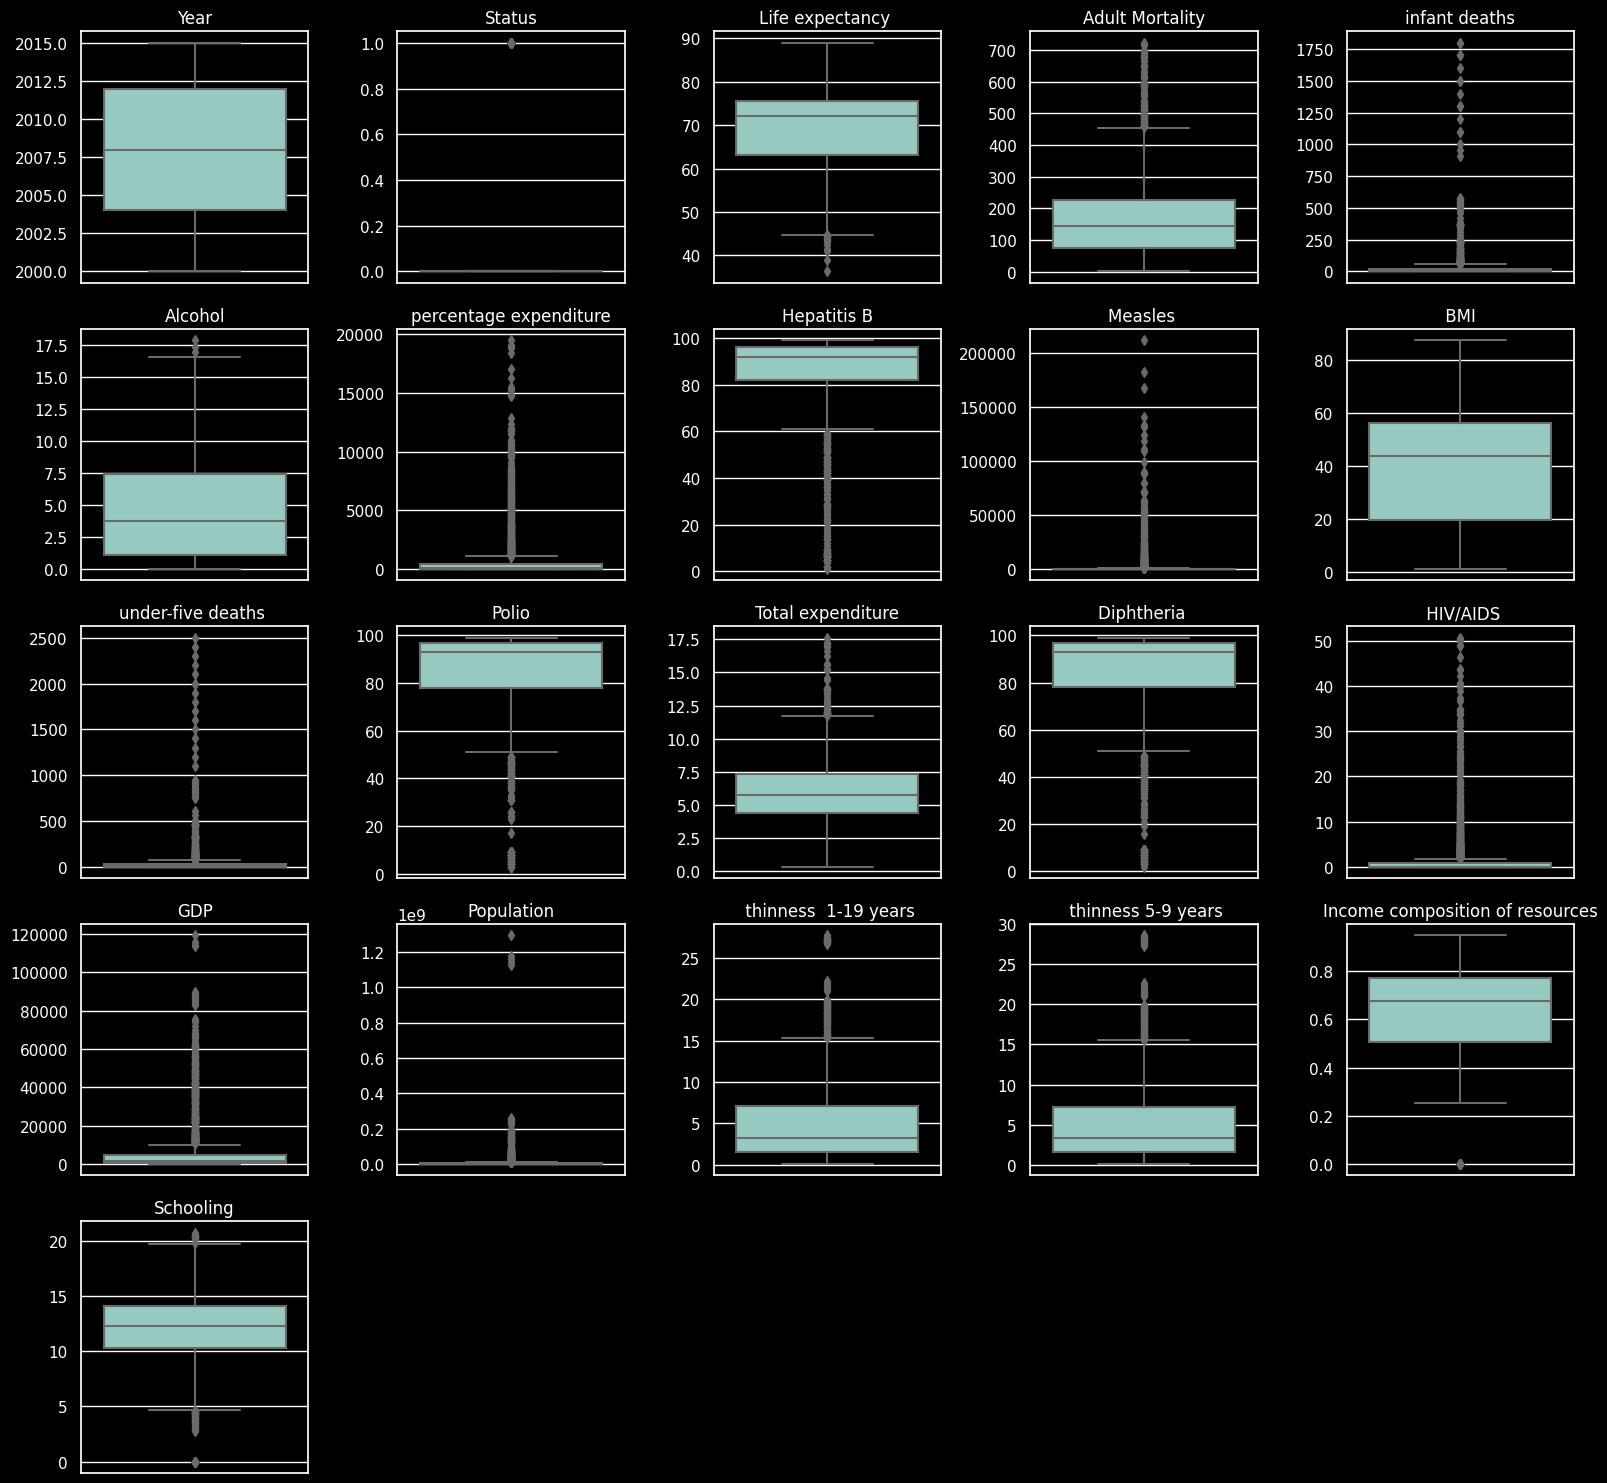

In [92]:
# Display shape before outlier detection
print("Shape before applying Winsorization:", cleaned_df.shape)

# Create box plots for each numerical column to visualize outliers
nrows = (len(numerical_cols) // 5) + (len(numerical_cols) % 5 > 0)  # Calculate required rows
plt.figure(figsize=(16, nrows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, 5, i)  # Create subplot
    sns.boxplot(data=cleaned_df, y=col)  # Box plot for the cleaned DataFrame
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

Shape of the DataFrame after Winsorization: (2938, 22)


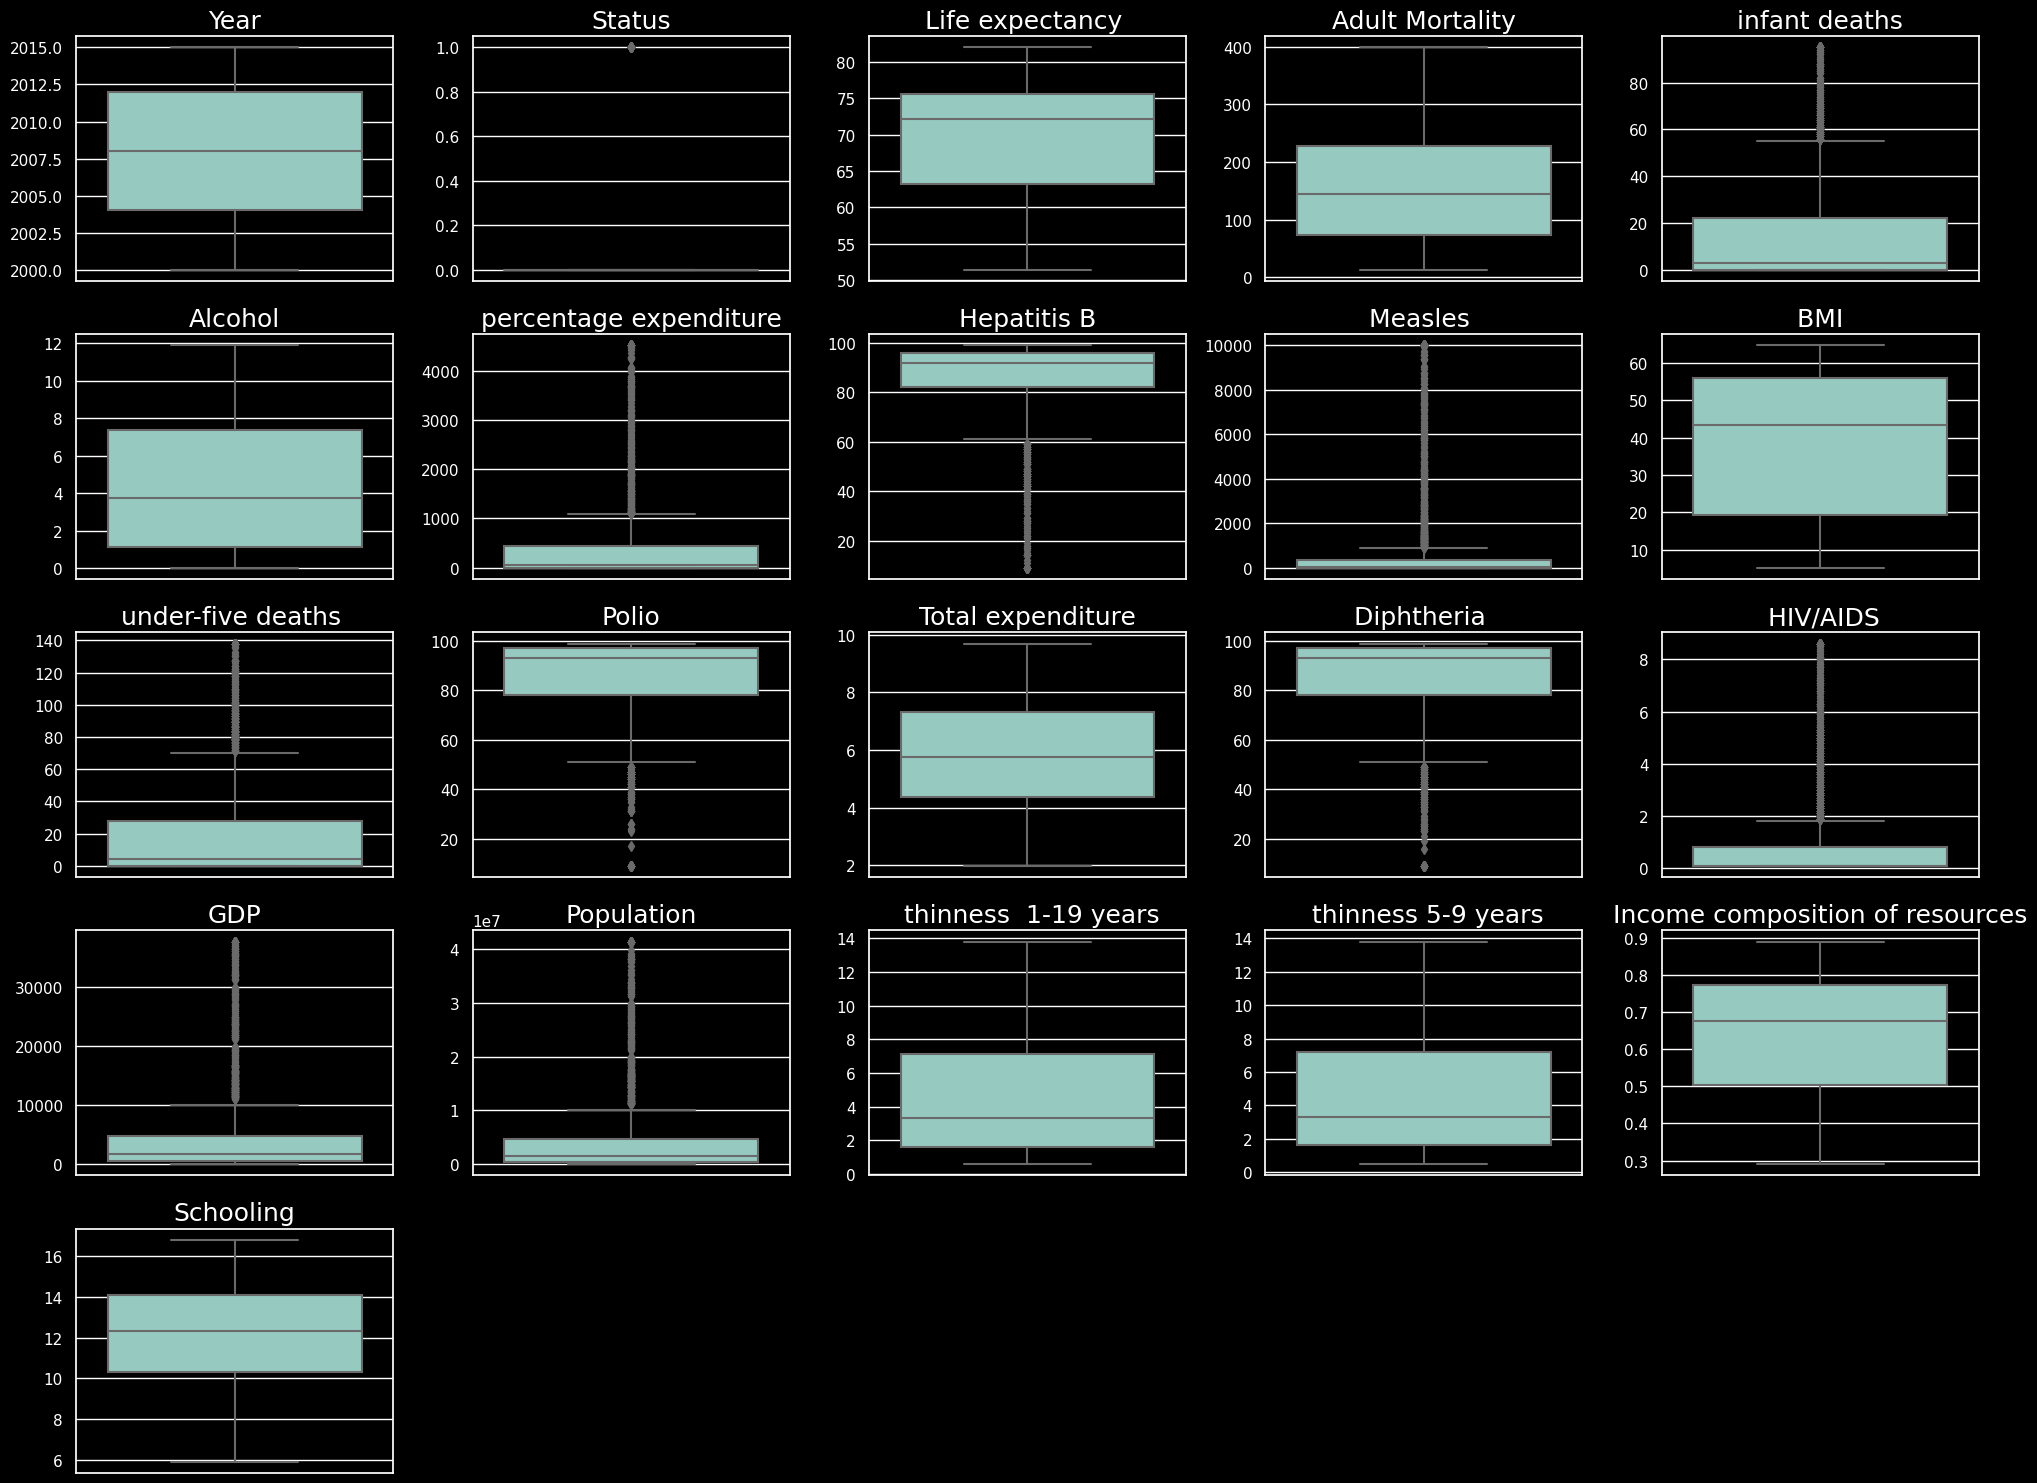

In [93]:
# Identify all numerical columns
numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Handling Outliers: Winsorization for all numerical columns
for column in numerical_cols:
    cleaned_df[column] = mstats.winsorize(cleaned_df[column], limits=[0.05, 0.05])
    
# Print the shape of the DataFrame after Winsorization
print("Shape of the DataFrame after Winsorization:", cleaned_df.shape)

# Box Plot Visualization After Winsorization
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 5) + (len(numerical_cols) % 5 > 0), 5, i)
    sns.boxplot(y=cleaned_df[column])
    plt.title(column, fontsize=18)
    plt.ylabel('')
plt.tight_layout()
plt.show()


In [94]:
# Calculate outliers percentage after Winsorization
outlier_percentages = {}

for column in numerical_cols:
    outliers = detect_outliers_iqr(cleaned_df, column)
    outlier_count = len(outliers)
    total_count = len(cleaned_df)
    
    # Calculate percentage of outliers
    outlier_percentage = (outlier_count / total_count) * 100
    outlier_percentages[column] = outlier_percentage

# Convert to DataFrame for better visualization
outlier_percentage_df = pd.DataFrame(outlier_percentages.items(), columns=['Column', 'Outlier Percentage'])
print(outlier_percentage_df)


                             Column  Outlier Percentage
0                              Year            0.000000
1                            Status           17.426821
2                  Life expectancy             0.000000
3                   Adult Mortality            0.000000
4                     infant deaths           10.721579
5                           Alcohol            0.000000
6            percentage expenditure           13.240300
7                       Hepatitis B           10.959837
8                          Measles            18.447924
9                              BMI             0.000000
10               under-five deaths            13.410483
11                            Polio            9.496256
12                Total expenditure            0.000000
13                      Diphtheria            10.142954
14                         HIV/AIDS           18.447924
15                              GDP           15.146358
16                       Population           15

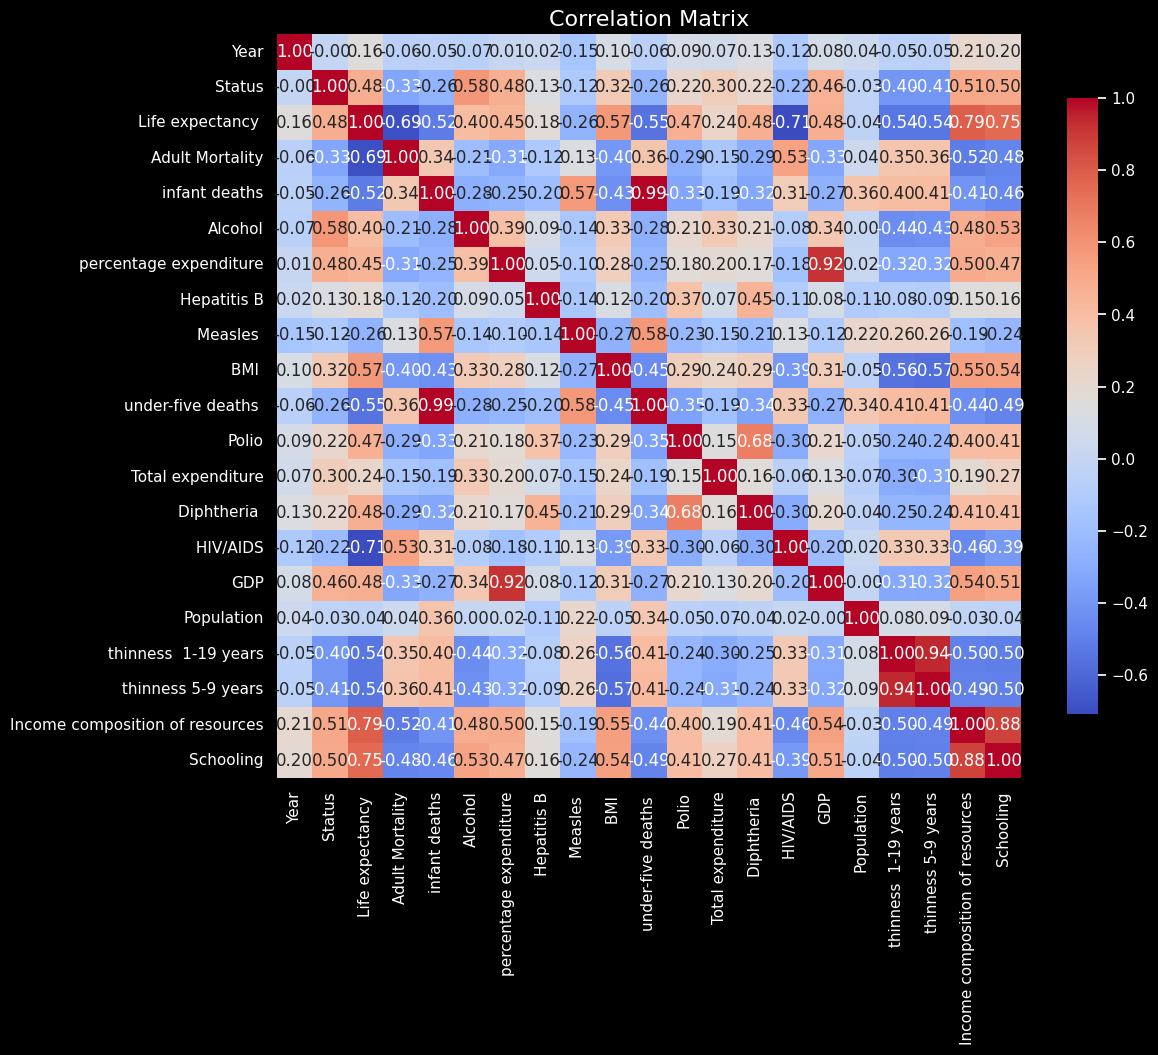

In [95]:
# Select only numeric columns
numeric_df = cleaned_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Matrix', fontsize=16)
plt.show()


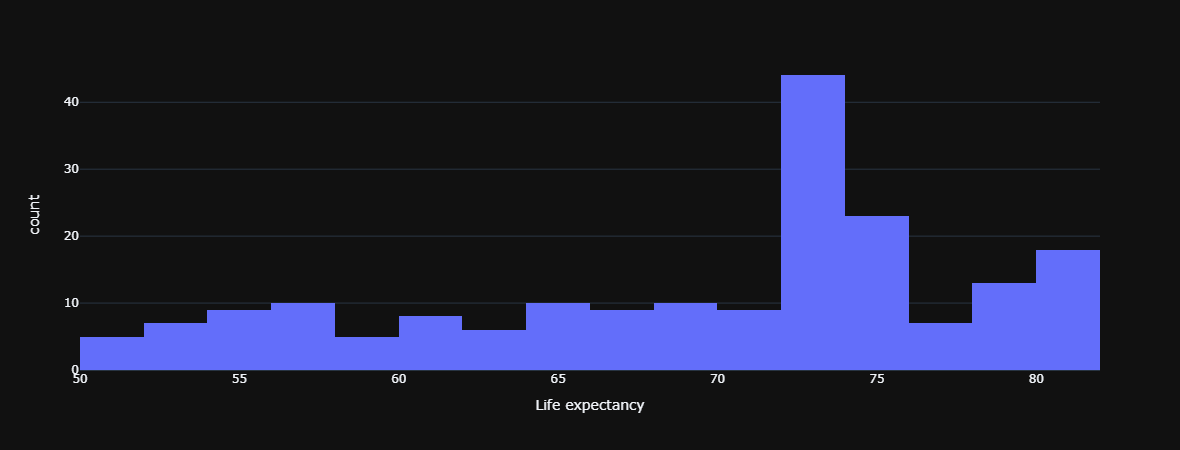

In [96]:
# Group by 'Country' and take the mean value of 'Life expectancy '
country_life_expectancy = cleaned_df.groupby('Country')['Life expectancy '].mean()

# Plot the histogram for unique countries
fig = px.histogram(country_life_expectancy, x='Life expectancy ', nbins=30, template='plotly_dark')
fig.show()

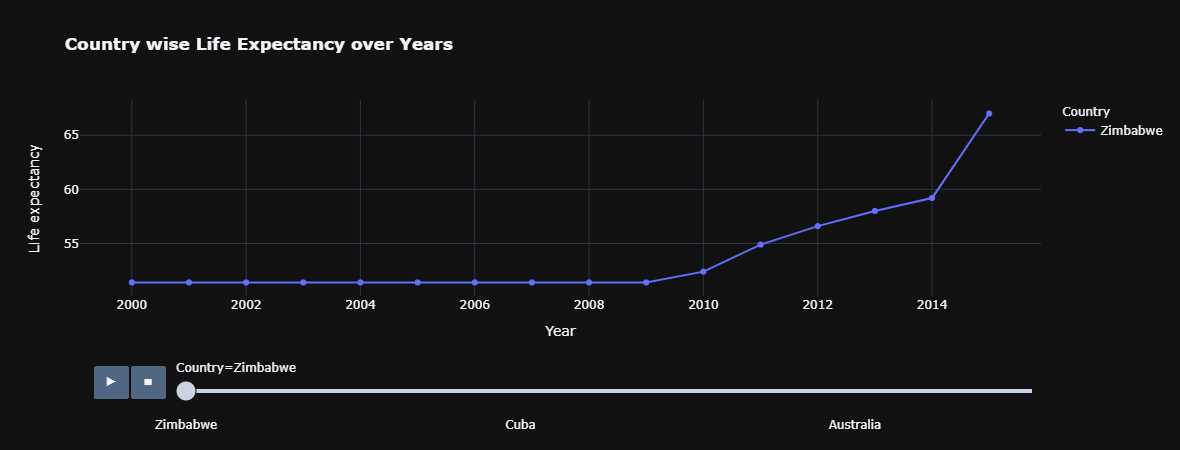

In [97]:
# Creating an animated line plot of life expectancy by country over the years
fig=px.line(cleaned_df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

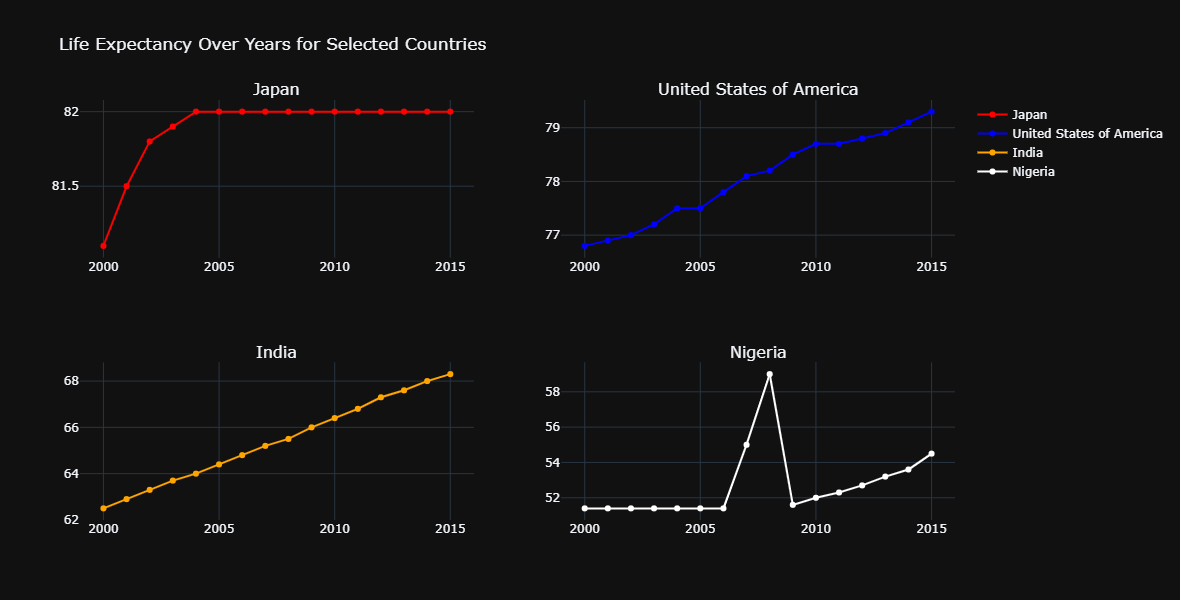

In [98]:
# Define the countries for comparison
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the cleaned DataFrame for these countries
filtered_df = cleaned_df[cleaned_df['Country'].isin(developed_countries + developing_countries)]

# Creating a subplot with 2 rows and 2 columns
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=developed_countries + developing_countries)

# Defining colors for each country
colors = ['red', 'blue', 'orange', 'white']
country_labels = developed_countries + developing_countries

# Adding a line plot for each country with specific colors and both lines and markers
for i, country in enumerate(country_labels):
    country_data = filtered_df[filtered_df['Country'] == country]
    
    fig.add_trace(
        go.Scatter(
            x=country_data['Year'],
            y=country_data['Life expectancy '],
            mode='lines+markers',
            line=dict(color=colors[i]),
            name=country
        ),
        row=i // 2 + 1,
        col=i % 2 + 1
    )

# Updating layout parameters
fig.update_layout(
    height=600,
    width=700,
    title_text='Life Expectancy Over Years for Selected Countries',
    template='plotly_dark',
    showlegend=True,
)

# Show the plot
fig.show()


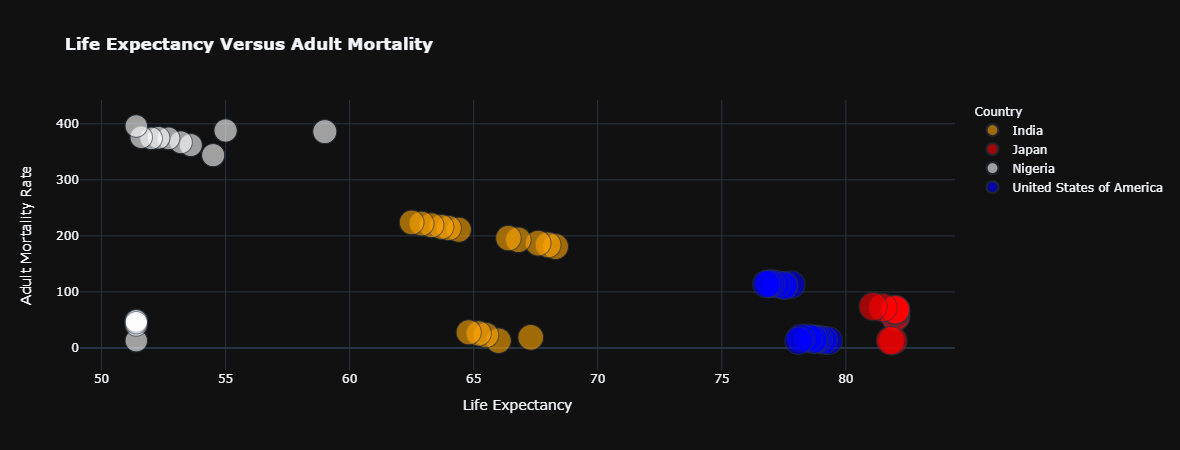

In [99]:
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the DataFrame for these countries
filtered_df = cleaned_df[cleaned_df['Country'].isin(developed_countries + developing_countries)]

# Defining custom colors for each country
custom_colors = ['orange', 'red', 'white', 'blue']

# Creating scatter plot for filtered countries with custom colors
fig = px.scatter(
    filtered_df,
    y='Adult Mortality',
    x='Life expectancy ',
    color='Country',
    size='Life expectancy ',
    color_discrete_sequence=custom_colors,
    template='plotly_dark',
    opacity=0.6,
    title='<b> Life Expectancy Versus Adult Mortality',
    labels={'Adult Mortality': 'Adult Mortality Rate', 'Life expectancy ': 'Life Expectancy'},
)

# Show the plot
fig.show()


<Axes: title={'center': 'General Government Expenditure on Health as a Percentage of Total Government Expenditure (%)'}, xlabel='Total Percentage', ylabel='Count'>

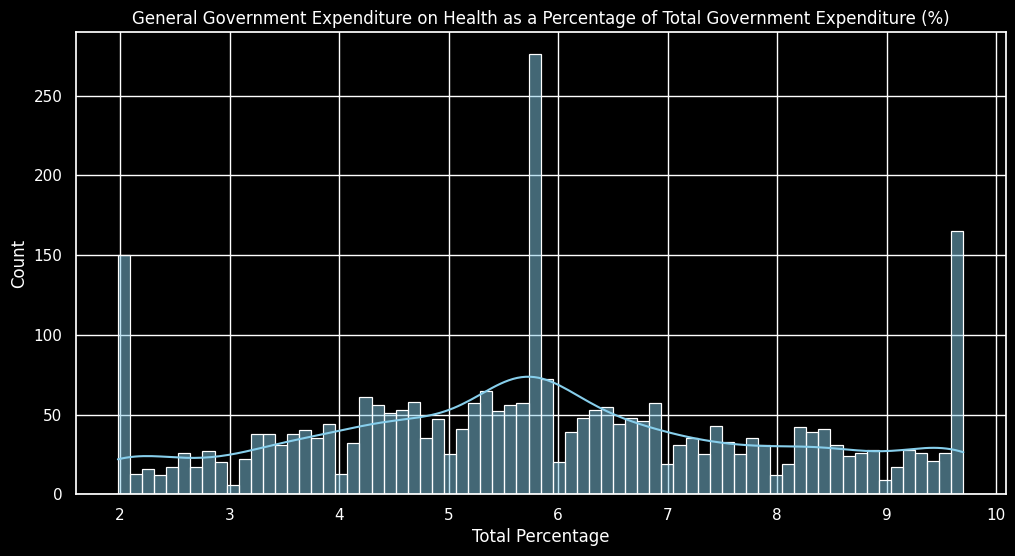

In [100]:
# Plotting a histogram of total government expenditure on health
plt.figure(figsize=(12, 6))
plt.title('General Government Expenditure on Health as a Percentage of Total Government Expenditure (%)')
plt.xlabel('Total Percentage')
plt.ylabel('Count')

sns.histplot(cleaned_df, x='Total expenditure',bins=70, color='skyblue', kde=True)

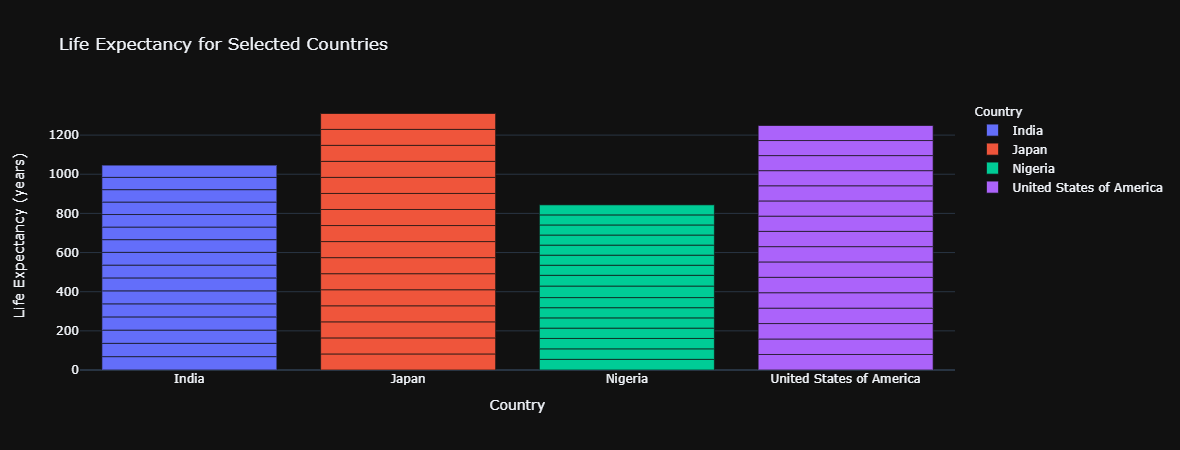

In [101]:
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the DataFrame for these countries
filtered_df = cleaned_df[cleaned_df['Country'].isin(developed_countries + developing_countries)]

# Creating a bar chart for life expectancy
fig = px.bar(
    filtered_df,
    x='Country',
    y='Life expectancy ', 
    color='Country',
    template='plotly_dark',
    title='Life Expectancy for Selected Countries',
    labels={'Life expectancy ': 'Life Expectancy (years)', 'Country': 'Country'},
)

# Show the plot
fig.show()


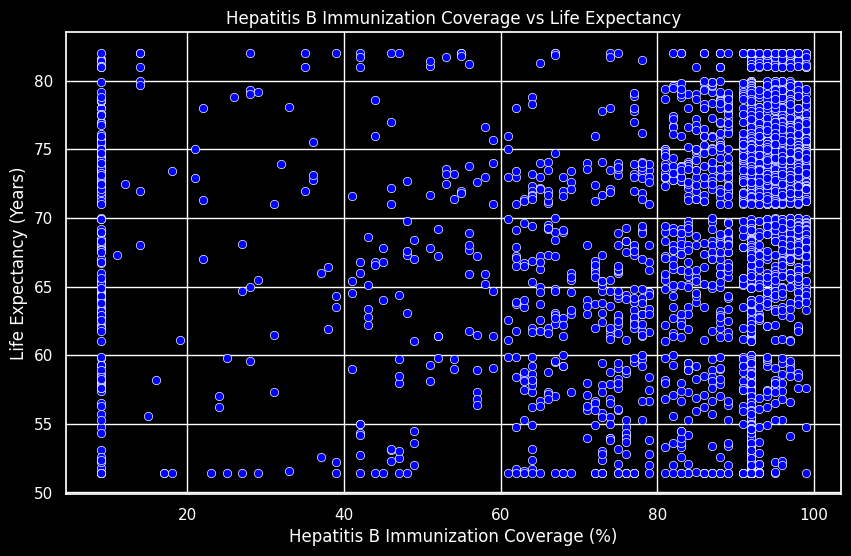

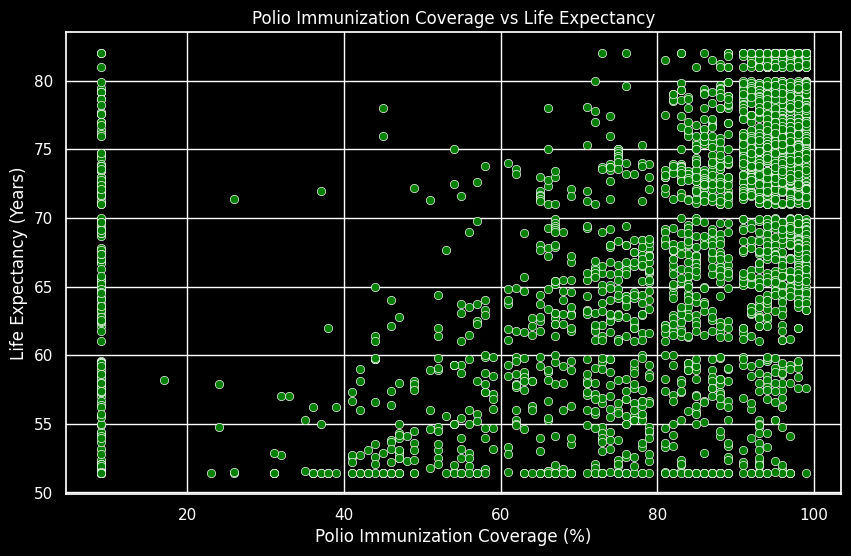

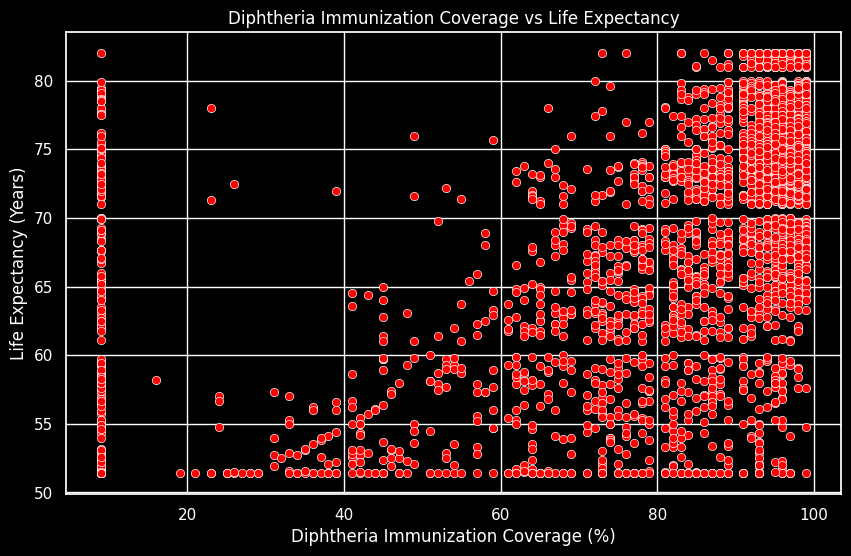

In [102]:
# Scatter plot for Hepatitis B immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Hepatitis B', y='Life expectancy ', color='blue')
plt.title('Hepatitis B Immunization Coverage vs Life Expectancy')
plt.xlabel('Hepatitis B Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

# Scatter plot for Polio immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Polio', y='Life expectancy ', color='green')
plt.title('Polio Immunization Coverage vs Life Expectancy')
plt.xlabel('Polio Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

# Scatter plot for Diphtheria immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Diphtheria ', y='Life expectancy ', color='red')
plt.title('Diphtheria Immunization Coverage vs Life Expectancy')
plt.xlabel('Diphtheria Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()


In [103]:
# Check the columns in the cleaned_data DataFrame
print(cleaned_df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [104]:
# Filter dataset for specific countries
target_countries = ['Japan', 'United States of America', 'India', 'Nigeria']
filtered_data = cleaned_df[cleaned_df['Country'].isin(target_countries)]

# Add a 'Development Status' column
filtered_data['Development Status'] = filtered_data['Country'].apply(
    lambda x: 'Developed' if x in ['Japan', 'United States of America'] else 'Developing'
)

print("Filtered and labeled data for target countries loaded successfully!")

Filtered and labeled data for target countries loaded successfully!


In [105]:
# Strip leading and trailing spaces from column names
filtered_data.columns = filtered_data.columns.str.strip()

# Check the updated column names
print(filtered_data.columns.tolist())

# Updated features list
features = [
    'Adult Mortality',
    'infant deaths',
    'Alcohol',
    'Hepatitis B',
    'Measles',
    'BMI',
    'under-five deaths',
    'Polio',
    'Total expenditure',
    'GDP',
    'Income composition of resources',
    'Schooling'
]

# Prepare data for clustering
X = filtered_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering using 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
filtered_data['Cluster'] = kmeans.fit_predict(X_scaled)

print("Clustering complete, clusters added to data!")


['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Development Status']
Clustering complete, clusters added to data!


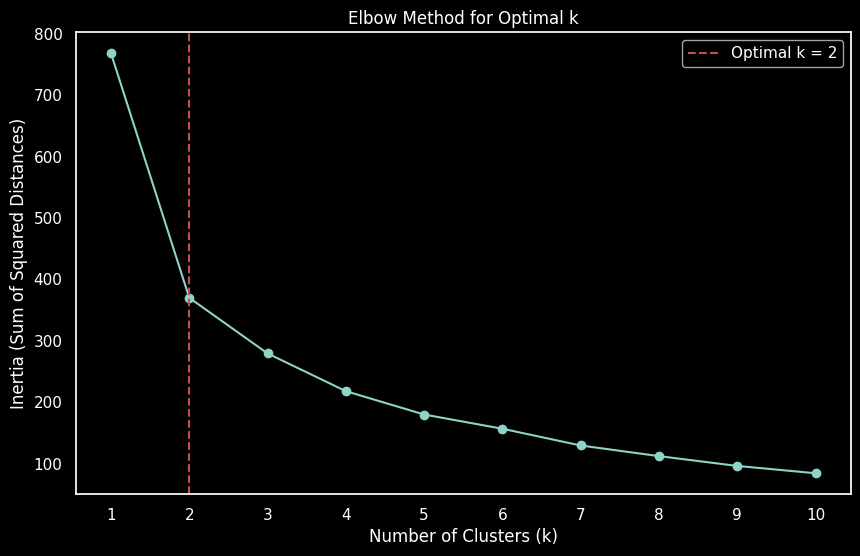

In [106]:
# Range of k values to test
k_values = range(1, 11)
inertia = []

# Loop through different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid()
plt.axvline(x=2, color='r', linestyle='--', label='Optimal k = 2')
plt.legend()
plt.show()


In [107]:
# Print countries in Cluster 0
cluster_0_countries = filtered_data[filtered_data['Cluster'] == 0][['Country', 'Development Status']]
print("Countries in Cluster 0:")
display(cluster_0_countries)

# Print countries in Cluster 1
cluster_1_countries = filtered_data[filtered_data['Cluster'] == 1][['Country', 'Development Status']]
print("Countries in Cluster 1:")
display(cluster_1_countries)


Countries in Cluster 0:


,Country,Development Status
1186,India,Developing
1187,India,Developing
1188,India,Developing
1189,India,Developing
1190,India,Developing
1191,India,Developing
1192,India,Developing
1193,India,Developing
1194,India,Developing
1195,India,Developing


Countries in Cluster 1:


,Country,Development Status
1314,Japan,Developed
1315,Japan,Developed
1316,Japan,Developed
1317,Japan,Developed
1318,Japan,Developed
1319,Japan,Developed
1320,Japan,Developed
1321,Japan,Developed
1322,Japan,Developed
1323,Japan,Developed


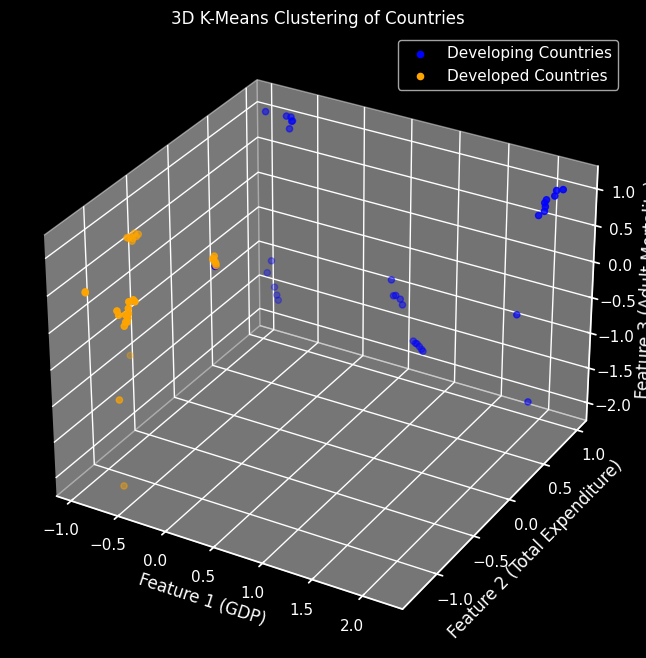

In [108]:
# 3D Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[filtered_data['Cluster'] == 0, 0], 
            X_scaled[filtered_data['Cluster'] == 0, 1], 
            X_scaled[filtered_data['Cluster'] == 0, 2], color='blue', label='Developing Countries')
ax.scatter(X_scaled[filtered_data['Cluster'] == 1, 0], 
            X_scaled[filtered_data['Cluster'] == 1, 1], 
            X_scaled[filtered_data['Cluster'] == 1, 2], color='orange', label='Developed Countries')

ax.set_title('3D K-Means Clustering of Countries')
ax.set_xlabel('Feature 1 (GDP)')
ax.set_ylabel('Feature 2 (Total Expenditure)')
ax.set_zlabel('Feature 3 (Adult Mortality)')
ax.legend()
plt.show()


In [109]:
# Check the actual column names in filtered_data
print(filtered_data.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Development Status', 'Cluster']


In [110]:
# Step 1: Define the correct feature names
features = [
    'Adult Mortality',
    'infant deaths',
    'Alcohol',
    'Hepatitis B',
    'Measles',
    'BMI',
    'under-five deaths',
    'Polio',
    'Total expenditure',
    'GDP',
    'Income composition of resources',
    'Schooling'
]
target = 'Life expectancy'

In [111]:
# Prepare feature set X and target variable y
X = filtered_data[features]
y = filtered_data[target]


In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {linear_mse}, R^2: {linear_r2}")

Linear Regression MSE: 2.703526966120037, R^2: 0.9763928026994649


In [114]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression MSE: {rf_mse}, R^2: {rf_r2}")

Random Forest Regression MSE: 3.181344769230763, R^2: 0.9722204976723279


In [115]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_importance = sorted(zip(importances, features), reverse=True)

print("Feature Importance:")
for importance, feature in feature_importance:
    print(f"{feature}: {importance}")

Feature Importance:
Income composition of resources: 0.2969233568005946
Schooling: 0.22130864359178984
infant deaths: 0.1836101214729763
under-five deaths: 0.09374738431218682
Polio: 0.09244728241239654
Alcohol: 0.07194749541620188
BMI: 0.022199023995233567
Total expenditure: 0.007563556798584123
GDP: 0.004313617093756738
Adult Mortality: 0.004287265280635092
Hepatitis B: 0.0010631329779355202
Measles: 0.0005891198477091092


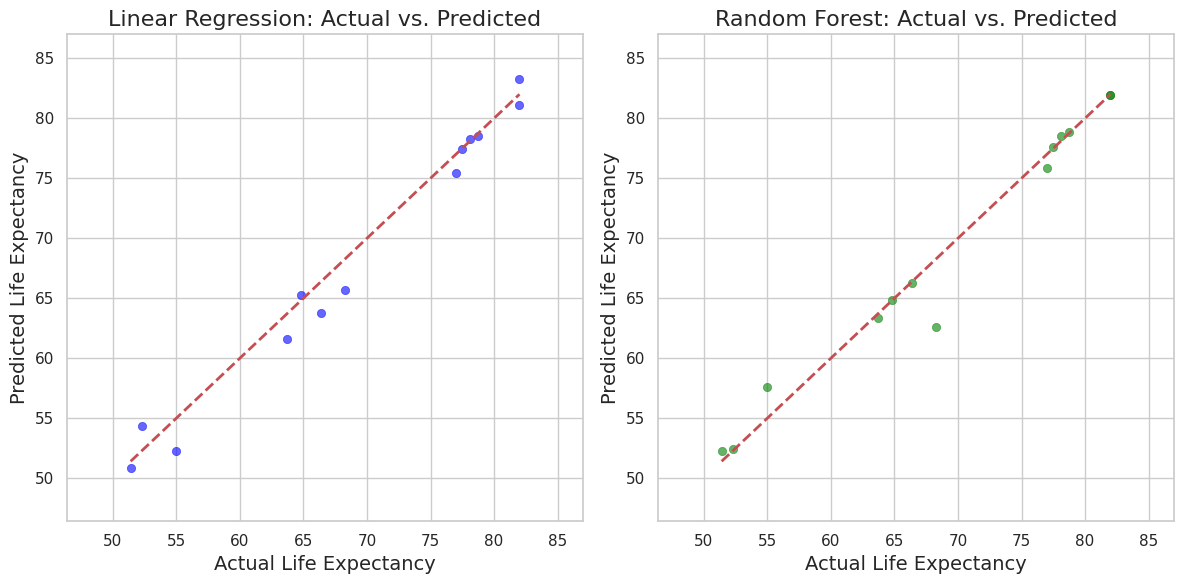

In [116]:
# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue', alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.title('Linear Regression: Actual vs. Predicted', fontsize=16)
plt.xlabel('Actual Life Expectancy', fontsize=14)
plt.ylabel('Predicted Life Expectancy', fontsize=14)
plt.xlim(y_test.min() - 5, y_test.max() + 5)
plt.ylim(y_test.min() - 5, y_test.max() + 5)
plt.grid(True)

# Random Forest Regression
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.title('Random Forest: Actual vs. Predicted', fontsize=16)
plt.xlabel('Actual Life Expectancy', fontsize=14)
plt.ylabel('Predicted Life Expectancy', fontsize=14)
plt.xlim(y_test.min() - 5, y_test.max() + 5)
plt.ylim(y_test.min() - 5, y_test.max() + 5)
plt.grid(True)

plt.tight_layout()
plt.show()


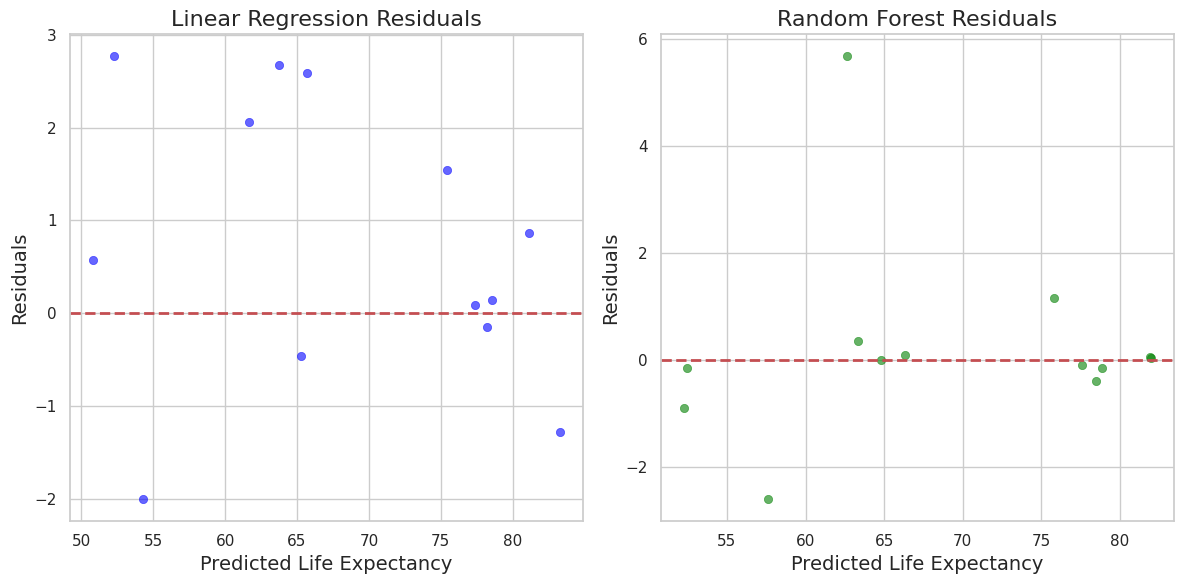

In [117]:
# Residual Plot
plt.figure(figsize=(12, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_linear, y=y_test - y_pred_linear, color='blue', alpha=0.6, edgecolor=None)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Linear Regression Residuals', fontsize=16)
plt.xlabel('Predicted Life Expectancy', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)

# Random Forest Residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_rf, y=y_test - y_pred_rf, color='green', alpha=0.6, edgecolor=None)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Random Forest Residuals', fontsize=16)
plt.xlabel('Predicted Life Expectancy', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


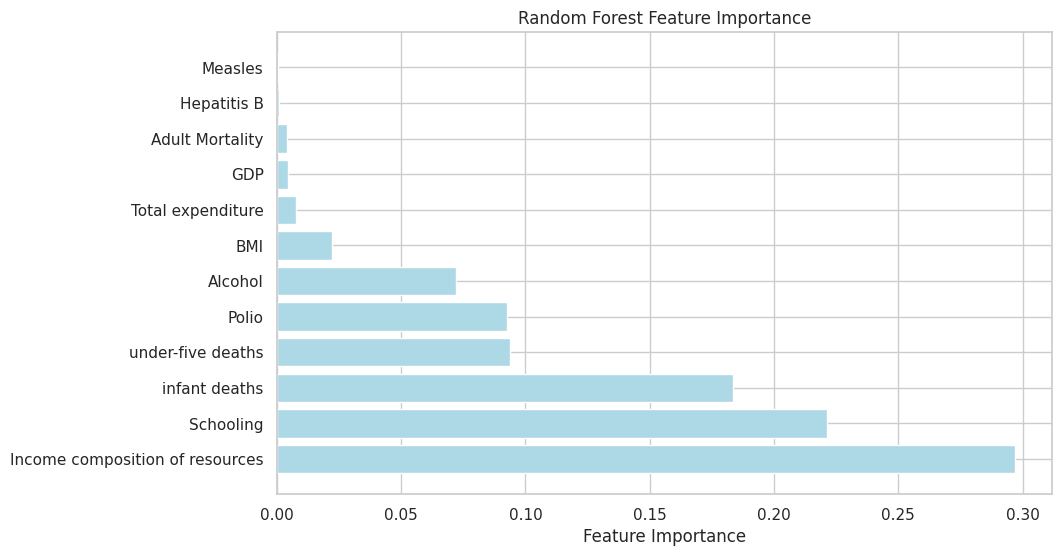

In [118]:
# Bar chart for feature importance
importances = rf_model.feature_importances_
features = sorted(zip(importances, features), reverse=True)

plt.figure(figsize=(10, 6))
plt.barh([feature for importance, feature in features], [importance for importance, feature in features], color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()
